In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Store Data

In [6]:
# Read data head
stores = pd.read_csv("store.csv")
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


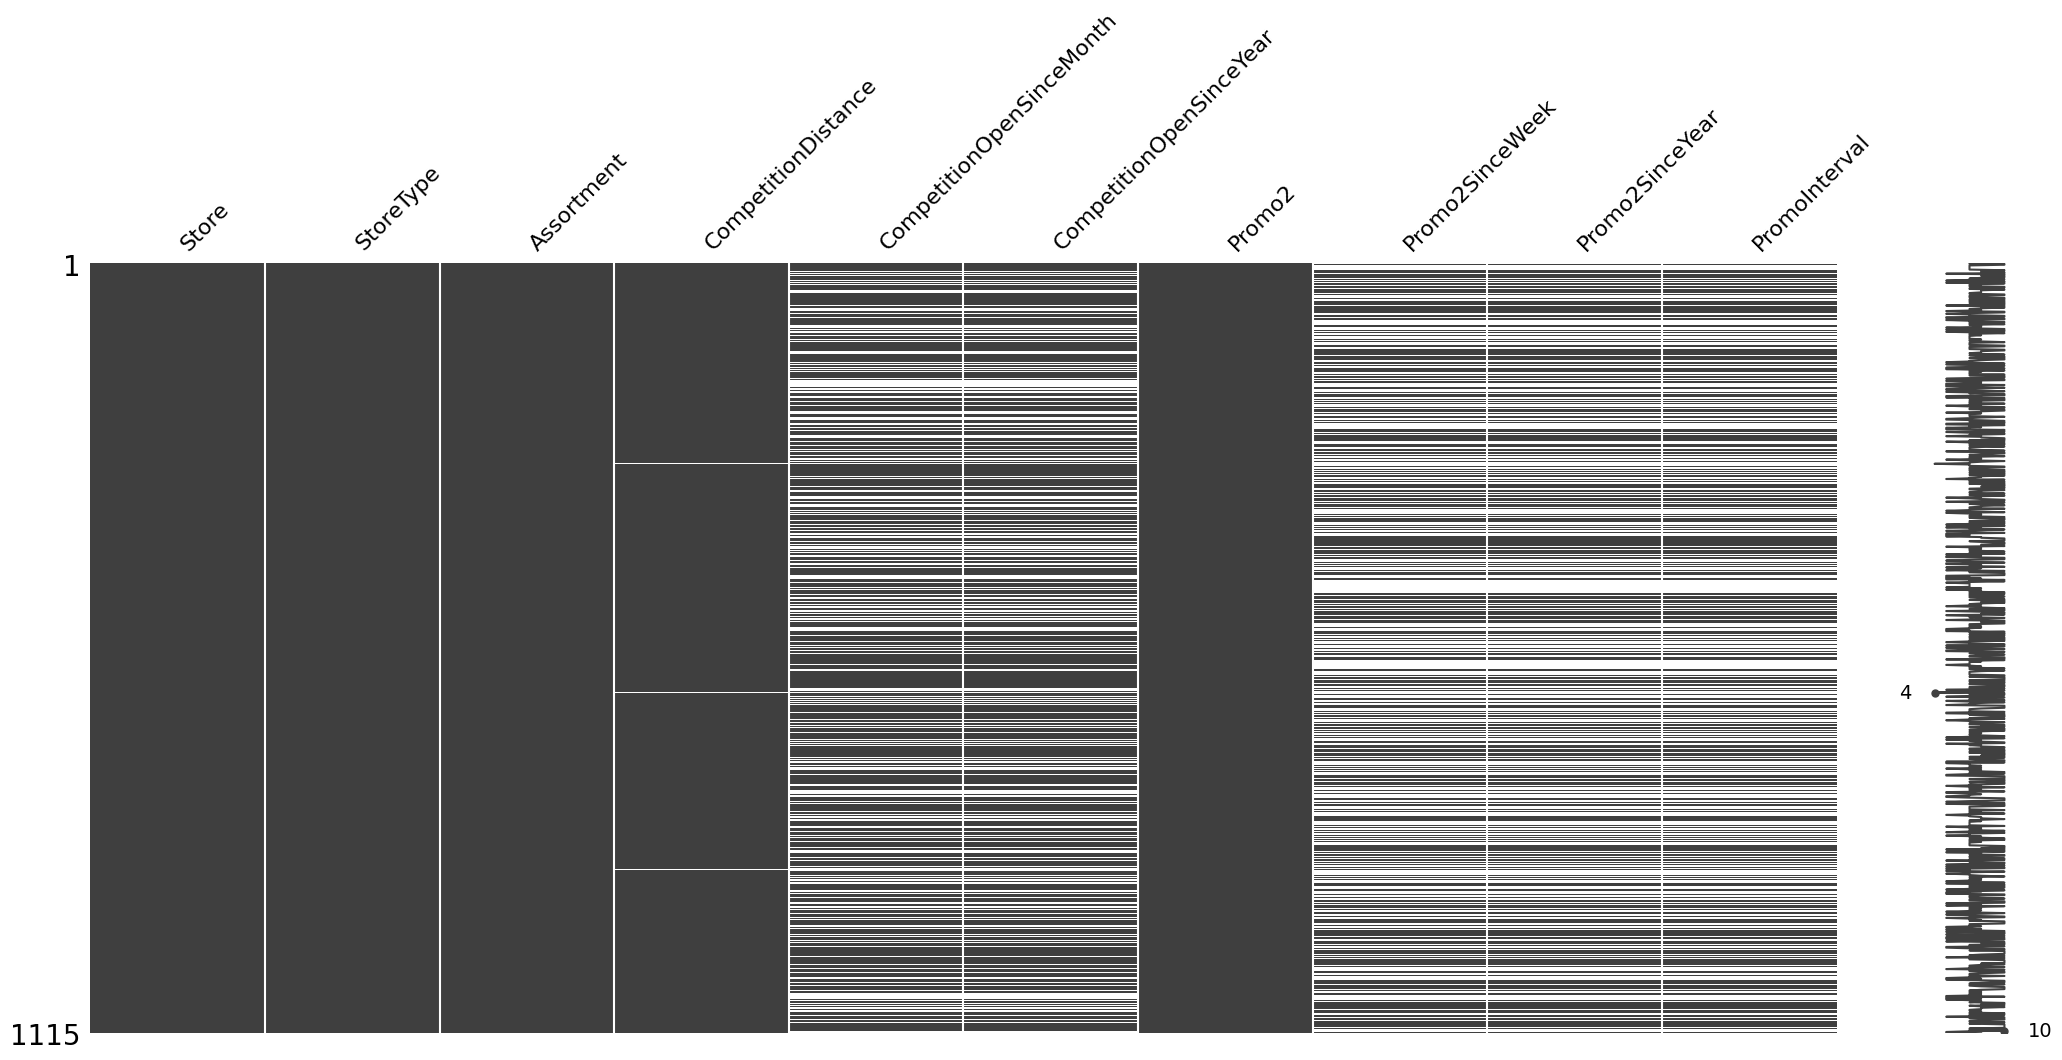

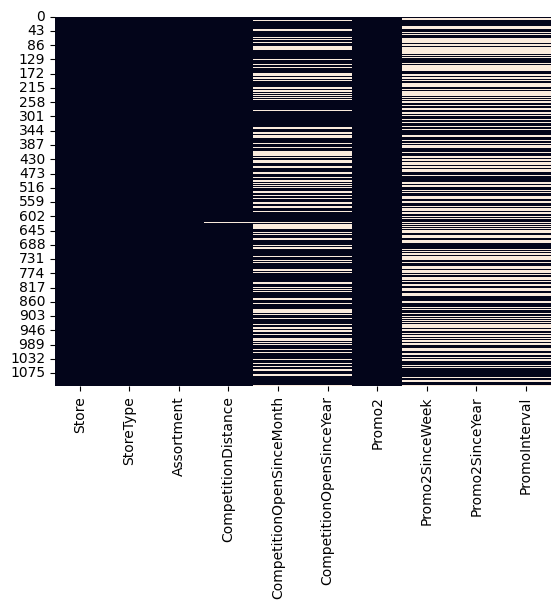

In [7]:
import missingno as msno

# Visualize missing data patterns
msno.matrix(stores)
plt.show()

# Or use seaborn's heatmap
sns.heatmap(stores.isnull(), cbar=False)
plt.show()


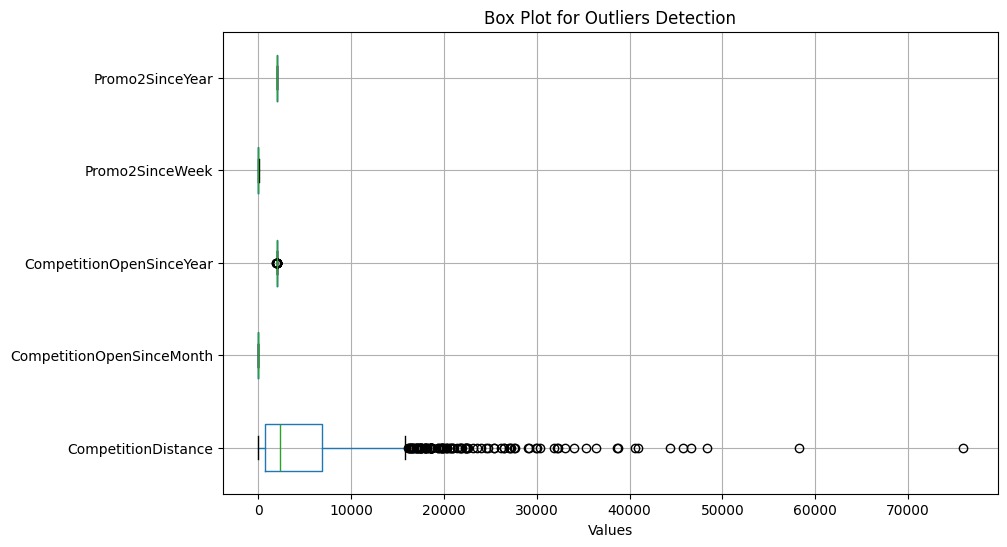

In [8]:
# Box plot to visualize outliers
selected_columns_stores = stores[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']]
selected_columns_stores.boxplot(figsize=(10, 6), vert=False)
plt.title('Box Plot for Outliers Detection')
plt.xlabel('Values')
plt.show()

In [9]:
stores['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [10]:
# Check null values
null_values = stores.isnull().sum()
na_values = stores.isna().sum()
print(null_values)
print(na_values)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [11]:
# Count number of contained values
stores.count()

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64

In [12]:
# Encoding StoreType, Assortment and PromoInterval
stores['StoreType'].value_counts()
stores['Assortment'].value_counts()
stores['PromoInterval'].value_counts()

# Assigns a unique integer to each category
label_encoder = LabelEncoder()
stores['StoreType_encoded'] = label_encoder.fit_transform(stores['StoreType'])
stores['Assortment_encoded'] = label_encoder.fit_transform(stores['Assortment'])

# Since PromoInterval is not ordinal, we need to create a custom mapping
promo_interval_mapping = {"Jan,Apr,Jul,Oct": 1, "Feb,May,Aug,Nov": 2, "Mar,Jun,Sept,Dec": 3}
stores['PromoInterval_encoded'] = stores['PromoInterval'].map(promo_interval_mapping)
stores['PromoInterval_encoded'].fillna(-1, inplace=True)
stores['PromoInterval_encoded'] = stores['PromoInterval_encoded'].astype('int32')

stores.head()

C:\Users\ShaheerAhmed\AppData\Local\Temp\ipykernel_10568\3409992141.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stores['PromoInterval_encoded'].fillna(-1, inplace=True)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_encoded,Assortment_encoded,PromoInterval_encoded
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,0,-1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,1
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,1
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2,2,-1
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,-1


In [13]:
# Replace corresponding rows with 0 where 'Promo2' is 0, for Promo2SinceWeek, Promo2SinceYear, PromoInterval
stores.loc[stores['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

# Convert 'Promo2SinceWeek' and 'Promo2SinceYear' to int64
stores['Promo2SinceWeek'] = stores['Promo2SinceWeek'].astype('int64')
stores['Promo2SinceYear'] = stores['Promo2SinceYear'].astype('int64')

# Construct Promo2Date by combining week and year.
stores['Promo2Date'] = pd.to_datetime(stores['Promo2SinceYear'].astype(str) + stores['Promo2SinceWeek'].astype(str) + '1', format='%Y%U%w', errors='coerce')
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_encoded,Assortment_encoded,PromoInterval_encoded,Promo2Date
0,1,c,a,1270.0,9.0,2008.0,0,0,0,0,2,0,-1,NaT
1,2,a,a,570.0,11.0,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",0,0,1,2010-03-29
2,3,a,a,14130.0,12.0,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",0,0,1,2011-04-04
3,4,c,c,620.0,9.0,2009.0,0,0,0,0,2,2,-1,NaT
4,5,a,a,29910.0,4.0,2015.0,0,0,0,0,0,0,-1,NaT


In [14]:
# Check datatypes
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      1115 non-null   int64         
 1   StoreType                  1115 non-null   object        
 2   Assortment                 1115 non-null   object        
 3   CompetitionDistance        1112 non-null   float64       
 4   CompetitionOpenSinceMonth  761 non-null    float64       
 5   CompetitionOpenSinceYear   761 non-null    float64       
 6   Promo2                     1115 non-null   int64         
 7   Promo2SinceWeek            1115 non-null   int64         
 8   Promo2SinceYear            1115 non-null   int64         
 9   PromoInterval              1115 non-null   object        
 10  StoreType_encoded          1115 non-null   int32         
 11  Assortment_encoded         1115 non-null   int32         
 12  PromoI

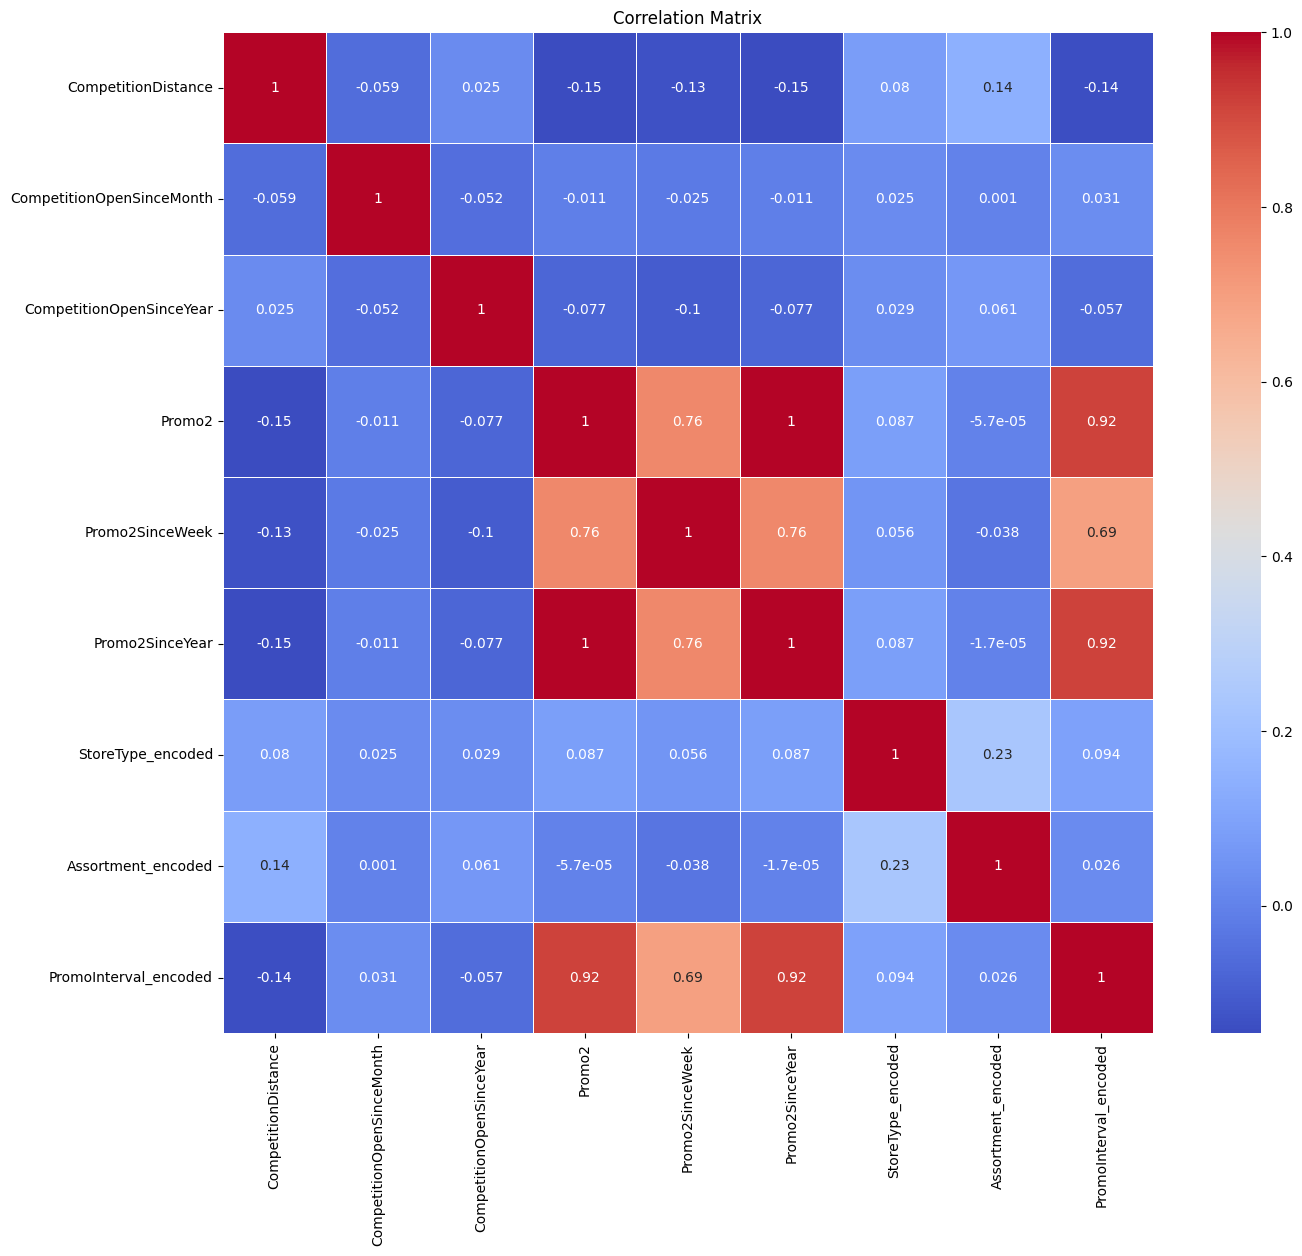

In [15]:
# Plotting correlation matrix
stores_copy = stores[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','StoreType_encoded','Assortment_encoded','PromoInterval_encoded']]
correlation_matrix = stores_copy.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

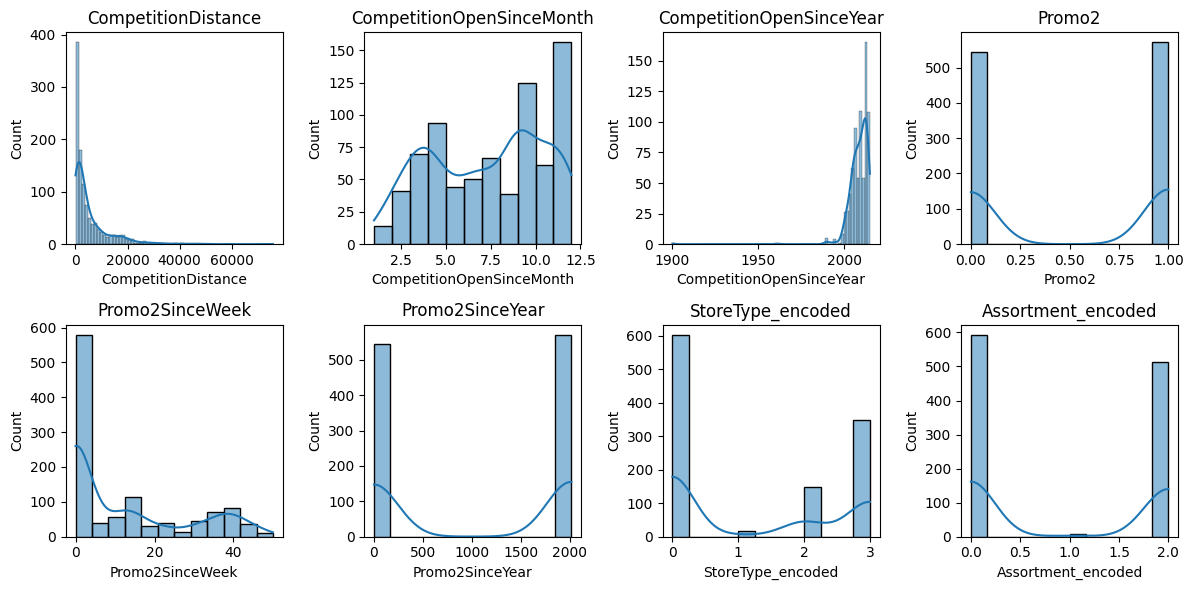

In [16]:
# Plotting data distribution
plt.figure(figsize=(12, 6))
for i, column in enumerate(stores_copy.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.histplot(stores_copy[column], kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [17]:
# For CompetitionOpenSinceMonth and CompetitionOpenSinceYear, check assortment
missing_values_df = stores[stores['CompetitionOpenSinceMonth'].isnull() & stores['CompetitionOpenSinceYear'].isnull()]
missing_values_df['Assortment'].value_counts()

Assortment
c    193
a    155
b      6
Name: count, dtype: int64

In [18]:
# For CompetitionOpenSinceMonth and CompetitionOpenSinceYear, check store type
missing_values_df = stores[stores['CompetitionOpenSinceMonth'].isnull() & stores['CompetitionOpenSinceYear'].isnull()]
missing_values_df['StoreType'].value_counts()

StoreType
a    176
d    129
c     41
b      8
Name: count, dtype: int64

In [19]:
# Calculate the median values for each 'Assortment' category
grouped_median_assortment = stores.groupby('Assortment')[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].median()

def impute_median_by_assortment(row, median_values):
    """
    Function to impute missing values with the median based on Assortment.
    """
    if pd.isna(row['CompetitionOpenSinceMonth']):
        row['CompetitionOpenSinceMonth'] = median_values.loc[row['Assortment'], 'CompetitionOpenSinceMonth']
    if pd.isna(row['CompetitionOpenSinceYear']):
        row['CompetitionOpenSinceYear'] = median_values.loc[row['Assortment'], 'CompetitionOpenSinceYear']
    return row

stores = stores.apply(lambda row: impute_median_by_assortment(row, grouped_median_assortment), axis=1)

In [20]:
# filling empty CompetitionDistance, with median as their distribution is skewed and not normally distributed
stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].median(), inplace=True)

C:\Users\ShaheerAhmed\AppData\Local\Temp\ipykernel_10568\4105569572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].median(), inplace=True)


In [21]:
# Convert month and year to integers
stores['CompetitionOpenSinceMonth'] = stores['CompetitionOpenSinceMonth'].astype('int64')
stores['CompetitionOpenSinceYear'] = stores['CompetitionOpenSinceYear'].astype('int64')
stores['CompetitionDistance'] = stores['CompetitionDistance'].astype('int64')

# Create a new feature 'CompetitionOpenSinceDate' by combining CompetitionOpenSinceMonth and CompetitionOpenSinceYear and assuming first day of month
stores['CompetitionOpenSinceDate'] = pd.to_datetime(stores['CompetitionOpenSinceYear'].astype(str) + stores['CompetitionOpenSinceMonth'].astype(str) + '1', format='%Y%U%w', errors='coerce')
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_encoded,Assortment_encoded,PromoInterval_encoded,Promo2Date,CompetitionOpenSinceDate
0,1,c,a,1270,9,2008,0,0,0,0,2,0,-1,NaT,2008-03-03
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",0,0,1,2010-03-29,2007-03-19
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,0,1,2011-04-04,2006-03-20
3,4,c,c,620,9,2009,0,0,0,0,2,2,-1,NaT,2009-03-02
4,5,a,a,29910,4,2015,0,0,0,0,0,0,-1,NaT,2015-01-26


### Train Data

In [22]:
# Reading train head
train = pd.read_csv("train.csv")
train.head()

C:\Users\ShaheerAhmed\AppData\Local\Temp\ipykernel_10568\3873907176.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [23]:
# Encoding categorical variables
train['StateHoliday'] = train['StateHoliday'].astype(str)
train['StateHoliday_encoded'] = label_encoder.fit_transform(train['StateHoliday'])

In [24]:
# Check whether Date corresponds to the correct DayOfWeek
train['Date'] = pd.to_datetime(train['Date'])
train['Day_of_Week'] = train['Date'].dt.dayofweek + 1

train['DayOfWeek'] = train['DayOfWeek'].astype('int64')
train['Day_of_Week'] = train['Day_of_Week'].astype('int64')

train['AreEqual'] = train['DayOfWeek'] == train['Day_of_Week']
train[train['AreEqual'] == False]

C:\Users\ShaheerAhmed\AppData\Local\Temp\ipykernel_10568\3945077725.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train['Date'] = pd.to_datetime(train['Date'])


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday_encoded,Day_of_Week,AreEqual


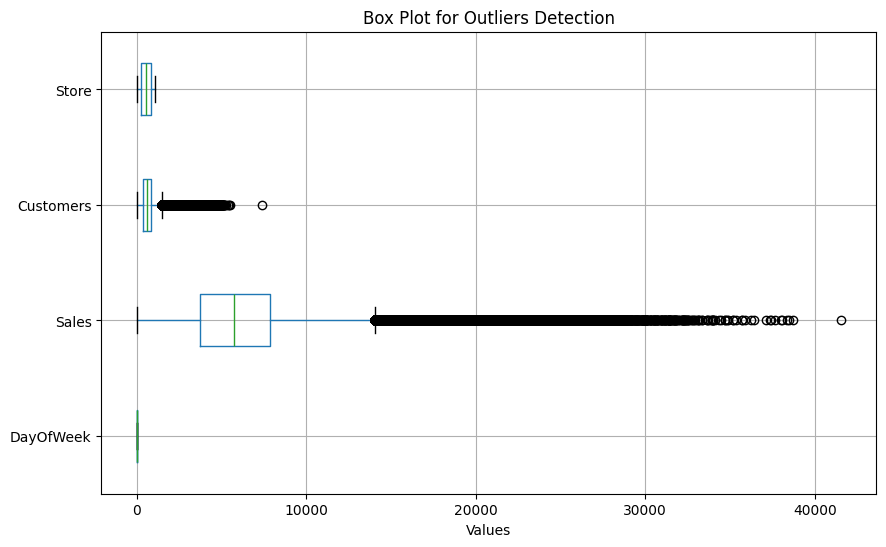

In [25]:
# Box plot to visualize outliers
selected_columns_train = train[['DayOfWeek','Sales','Customers','Store']]
selected_columns_train.boxplot(figsize=(10, 6), vert=False)
plt.title('Box Plot for Outliers Detection')
plt.xlabel('Values')
plt.show()

In [26]:
# Check null values
null_values2 = train.isnull().sum()
na_values2 = train.isna().sum()
print(null_values2)
print(na_values2)

Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
StateHoliday_encoded    0
Day_of_Week             0
AreEqual                0
dtype: int64
Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
StateHoliday_encoded    0
Day_of_Week             0
AreEqual                0
dtype: int64


In [27]:
# Count number of contained value
train.count()

Store                   1017209
DayOfWeek               1017209
Date                    1017209
Sales                   1017209
Customers               1017209
Open                    1017209
Promo                   1017209
StateHoliday            1017209
SchoolHoliday           1017209
StateHoliday_encoded    1017209
Day_of_Week             1017209
AreEqual                1017209
dtype: int64

In [28]:
# Creating a new variable for whether it was a holiday or not
train['isHoliday'] = train['SchoolHoliday'].apply(lambda x: 1 if x == 0 else 0)

In [29]:
# Check datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   DayOfWeek             1017209 non-null  int64         
 2   Date                  1017209 non-null  datetime64[ns]
 3   Sales                 1017209 non-null  int64         
 4   Customers             1017209 non-null  int64         
 5   Open                  1017209 non-null  int64         
 6   Promo                 1017209 non-null  int64         
 7   StateHoliday          1017209 non-null  object        
 8   SchoolHoliday         1017209 non-null  int64         
 9   StateHoliday_encoded  1017209 non-null  int32         
 10  Day_of_Week           1017209 non-null  int64         
 11  AreEqual              1017209 non-null  bool          
 12  isHoliday             1017209 non-null  in

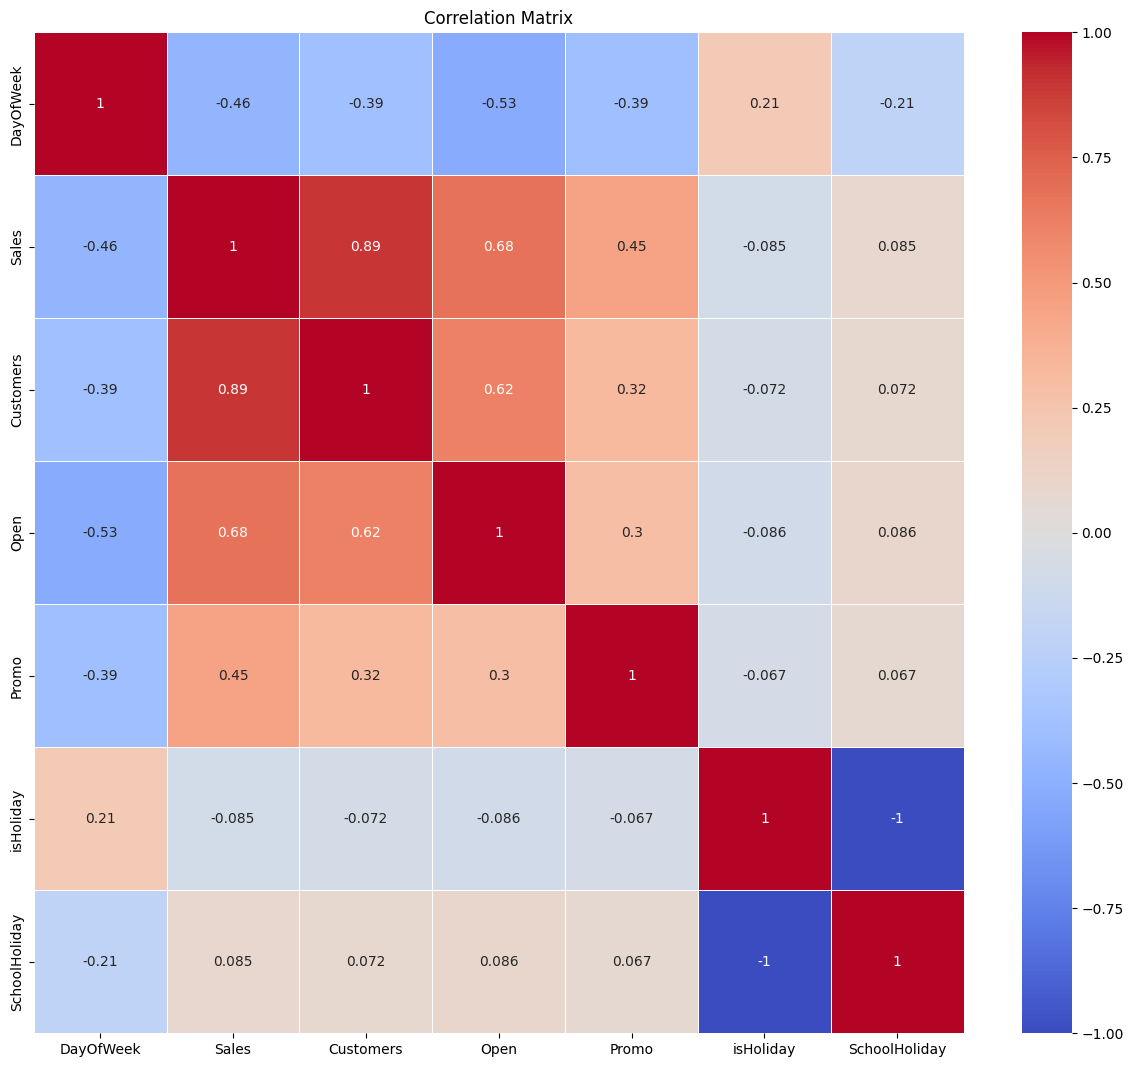

In [30]:
# Plotting correlation matrix
train_copy = train[['DayOfWeek','Sales','Customers','Open','Promo','isHoliday','SchoolHoliday']]
correlation_matrix = train_copy.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

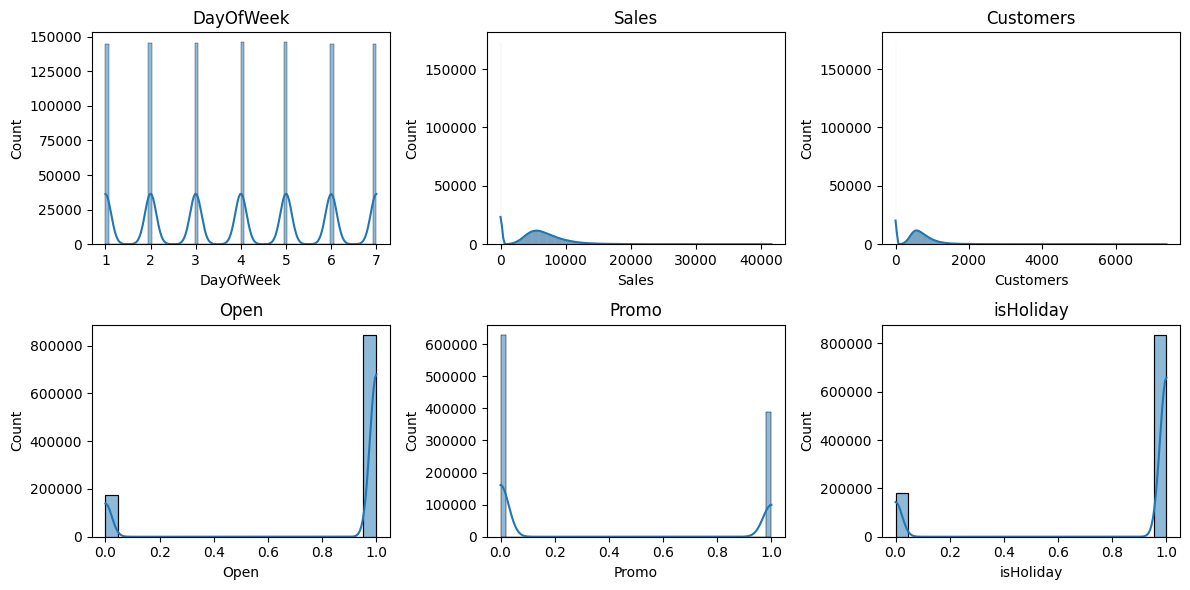

In [31]:
# Plotting data distribution
plt.figure(figsize=(12, 6))
for i, column in enumerate(train_copy.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_copy[column], kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

### Merging both dataframes

In [32]:
# merging train and stores
# stores = stores.drop(columns=['StoreType', 'Assortment'])
train = train.drop(columns=['Day_of_Week', 'AreEqual'])
merged_df = pd.merge(train, stores, on='Store')
merged_df.to_csv('merged_df.csv', encoding='utf-8', index=False)
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StateHoliday_encoded,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_encoded,Assortment_encoded,PromoInterval_encoded,Promo2Date,CompetitionOpenSinceDate
0,1,5,2015-07-31,5263,555,1,1,0,1,0,...,2008,0,0,0,0,2,0,-1,NaT,2008-03-03
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,2007,1,13,2010,"Jan,Apr,Jul,Oct",0,0,1,2010-03-29,2007-03-19
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,0,1,2011-04-04,2006-03-20
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,...,2009,0,0,0,0,2,2,-1,NaT,2009-03-02
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,2015,0,0,0,0,0,0,-1,NaT,2015-01-26


In [33]:
merged_df.count()

Store                        1017209
DayOfWeek                    1017209
Date                         1017209
Sales                        1017209
Customers                    1017209
Open                         1017209
Promo                        1017209
StateHoliday                 1017209
SchoolHoliday                1017209
StateHoliday_encoded         1017209
isHoliday                    1017209
StoreType                    1017209
Assortment                   1017209
CompetitionDistance          1017209
CompetitionOpenSinceMonth    1017209
CompetitionOpenSinceYear     1017209
Promo2                       1017209
Promo2SinceWeek              1017209
Promo2SinceYear              1017209
PromoInterval                1017209
StoreType_encoded            1017209
Assortment_encoded           1017209
PromoInterval_encoded        1017209
Promo2Date                    509178
CompetitionOpenSinceDate     1017209
dtype: int64

In [34]:
# merging test and stores
test = pd.read_csv("test.csv")
merged_df_test = pd.merge(test, stores, on='Store')
merged_df_test.to_csv('merged_df_test.csv', encoding='utf-8', index=False)
merged_df_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_encoded,Assortment_encoded,PromoInterval_encoded,Promo2Date,CompetitionOpenSinceDate
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,c,...,2008,0,0,0,0,2,0,-1,NaT,2008-03-03
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,0,1,2011-04-04,2006-03-20
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,...,2013,0,0,0,0,0,2,-1,NaT,2013-01-28
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,...,2014,0,0,0,0,0,0,-1,NaT,2014-03-10
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,...,2000,0,0,0,0,0,2,-1,NaT,2000-02-21


In [35]:
merged_df_test.count()

Store                        41088
DayOfWeek                    41088
Date                         41088
Sales                            0
Customers                        0
Open                         41077
Promo                        41088
StateHoliday                 41088
SchoolHoliday                41088
StoreType                    41088
Assortment                   41088
CompetitionDistance          41088
CompetitionOpenSinceMonth    41088
CompetitionOpenSinceYear     41088
Promo2                       41088
Promo2SinceWeek              41088
Promo2SinceYear              41088
PromoInterval                41088
StoreType_encoded            41088
Assortment_encoded           41088
PromoInterval_encoded        41088
Promo2Date                   23856
CompetitionOpenSinceDate     41088
dtype: int64

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StateHoliday_encoded       1017209 non-null  int32         
 10  isHoliday                  1017209 non-null  int64         
 11  StoreType                  1017209 no

### Data Analysis

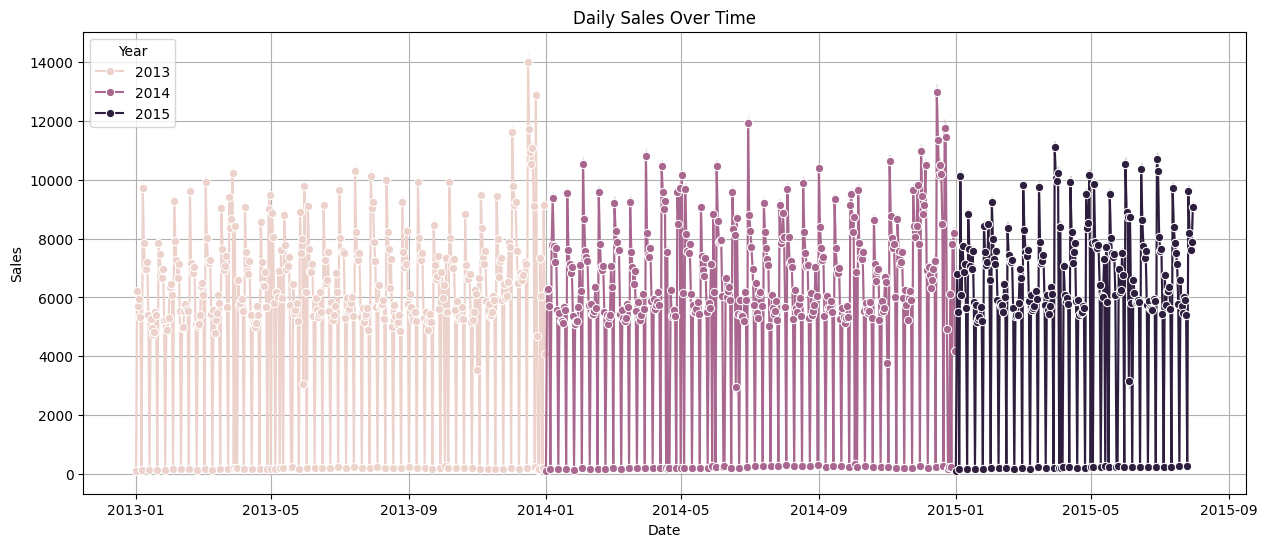

In [37]:
# Plot daily sales over time, on date level
merged_df['Year'] = merged_df['Date'].dt.year

# Create line plot using Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=merged_df, x="Date", y="Sales", hue="Year", marker='o', linestyle='-')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Year', loc='upper left')  # Add legend
plt.show()

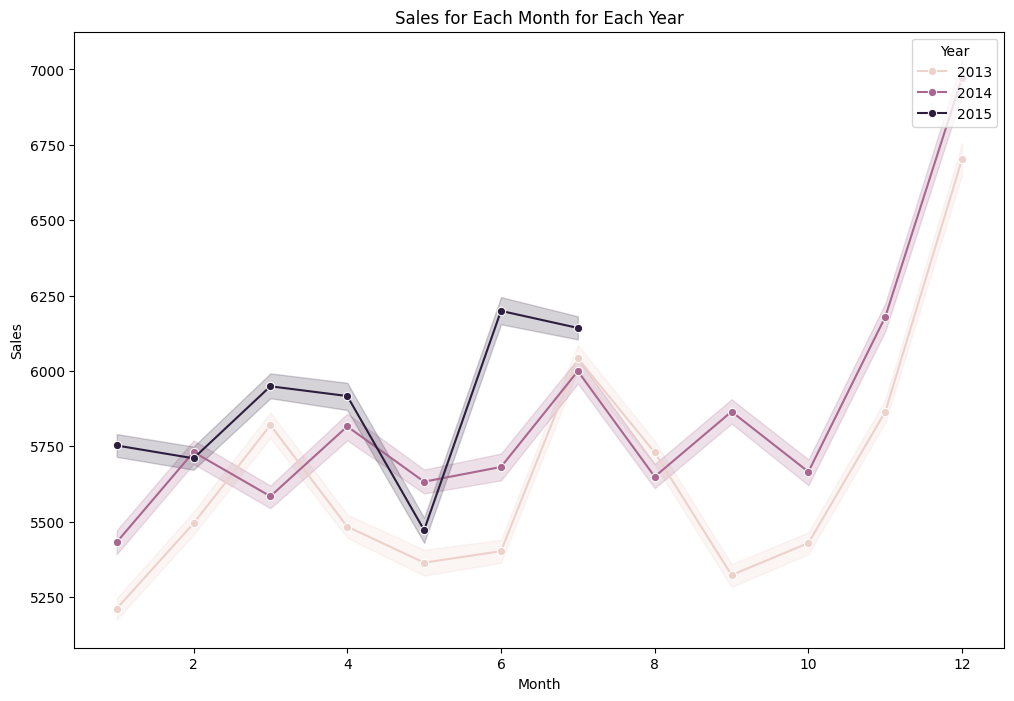

In [38]:
# Plot monthly sales each year
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')

# Extract year and month
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='Month', y='Sales', hue='Year', data=merged_df, marker='o')

# Customize the plot
ax.set_title('Sales for Each Month for Each Year')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
plt.legend(title='Year', loc='upper right')

# Show the plot
plt.show()

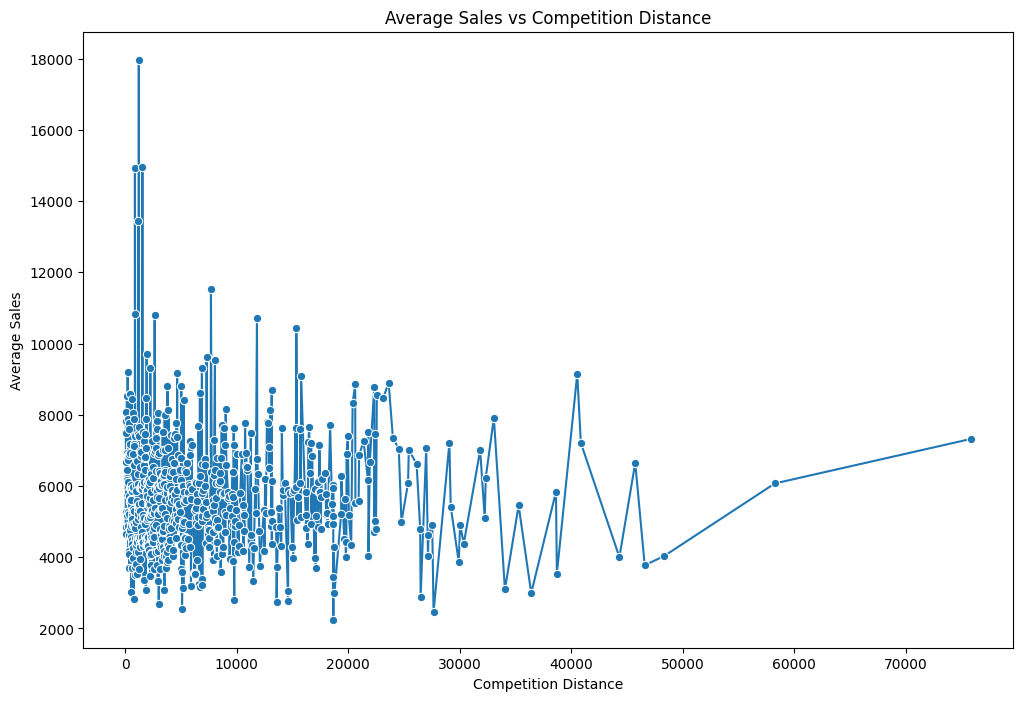

In [39]:
# Assuming your DataFrame is named merged_df
plt.figure(figsize=(12, 8))

# Group by CompetitionDistance and calculate the mean sales for each distance
average_sales_by_distance = merged_df.groupby('CompetitionDistance')['Sales'].mean().reset_index()

# Line plot for average sales vs competition distance
sns.lineplot(x='CompetitionDistance', y='Sales', data=average_sales_by_distance, marker='o')

plt.title('Average Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

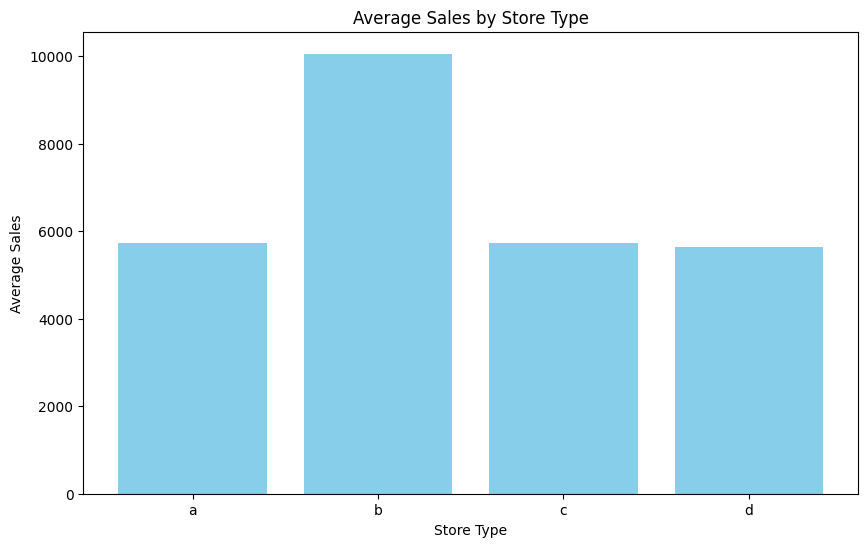

In [40]:
# Average sales by store type
average_sales_by_storetype = merged_df.groupby('StoreType')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_storetype['StoreType'], average_sales_by_storetype['Sales'], color='skyblue')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

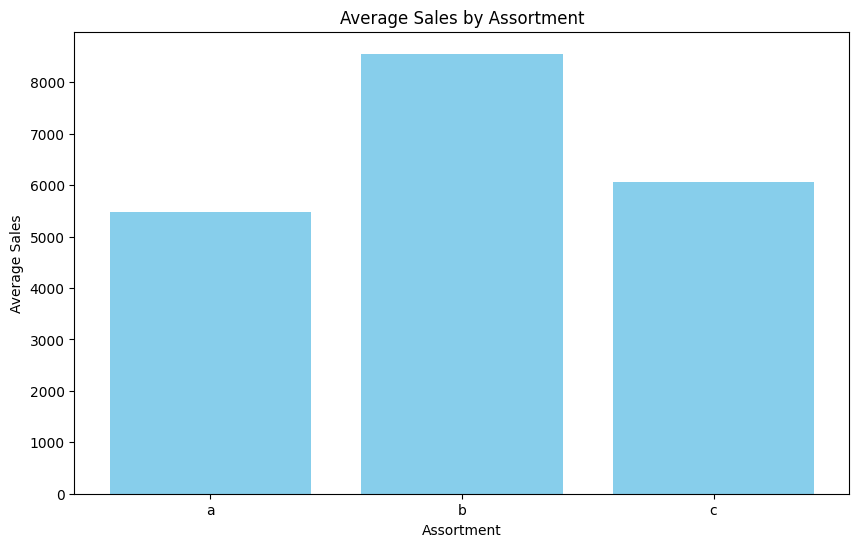

In [41]:
# Average sales by assortment
average_sales_by_assortment = merged_df.groupby('Assortment')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_assortment['Assortment'], average_sales_by_assortment['Sales'], color='skyblue')
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Average Sales')
plt.show()

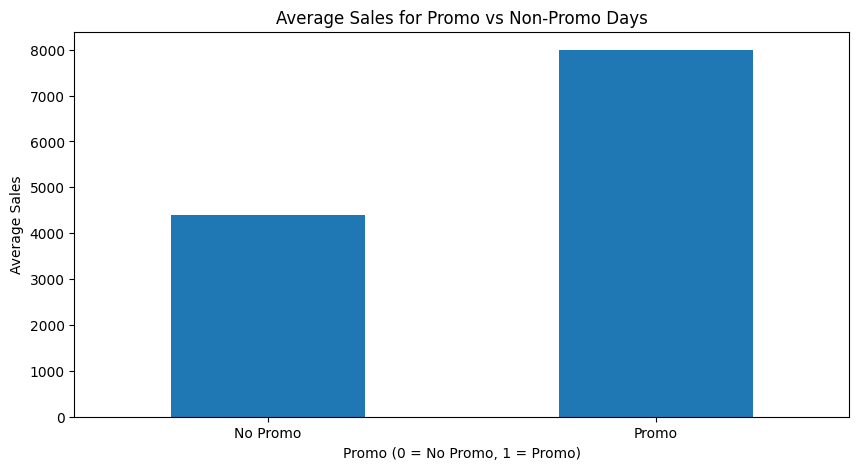

In [42]:
# Sales for promo vs non promo days
avg_sales_promo = merged_df.groupby('Promo')['Sales'].mean()
plt.figure(figsize=(10, 5))
avg_sales_promo.plot(kind='bar')
plt.title('Average Sales for Promo vs Non-Promo Days')
plt.xlabel('Promo (0 = No Promo, 1 = Promo)')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'], rotation=0)
plt.show()

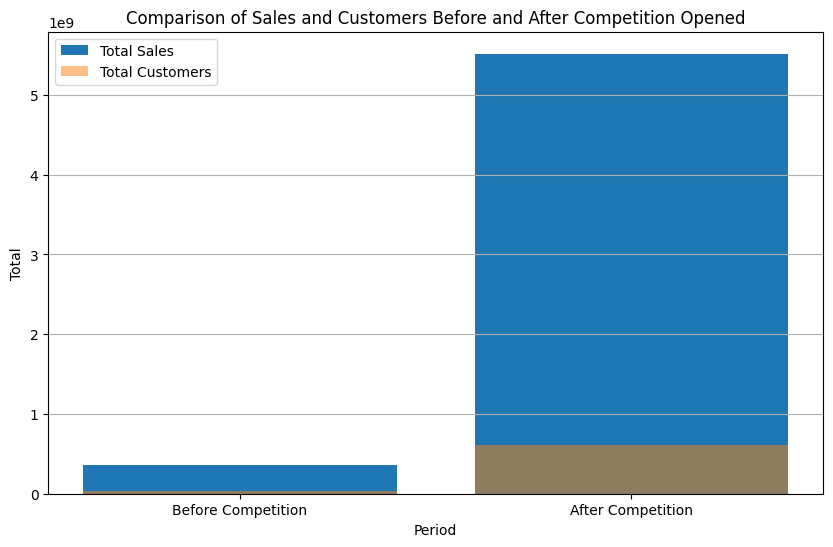

In [43]:
# Comparison of sales and customers for stores before competition was opened and sales after it opened
before_competition = merged_df[merged_df['Date'] < merged_df['CompetitionOpenSinceDate']]
after_competition = merged_df[merged_df['Date'] >= merged_df['CompetitionOpenSinceDate']]

total_sales_before = before_competition['Sales'].sum()
total_customers_before = before_competition['Customers'].sum()
total_sales_after = after_competition['Sales'].sum()
total_customers_after = after_competition['Customers'].sum()

plt.figure(figsize=(10, 6))
periods = ['Before Competition', 'After Competition']
sales_data = [total_sales_before, total_sales_after]
customers_data = [total_customers_before, total_customers_after]

plt.bar(periods, sales_data, label='Total Sales')
plt.bar(periods, customers_data, label='Total Customers', alpha=0.5)

plt.title('Comparison of Sales and Customers Before and After Competition Opened')
plt.xlabel('Period')
plt.ylabel('Total')
plt.legend()
plt.grid(axis='y')
plt.show()

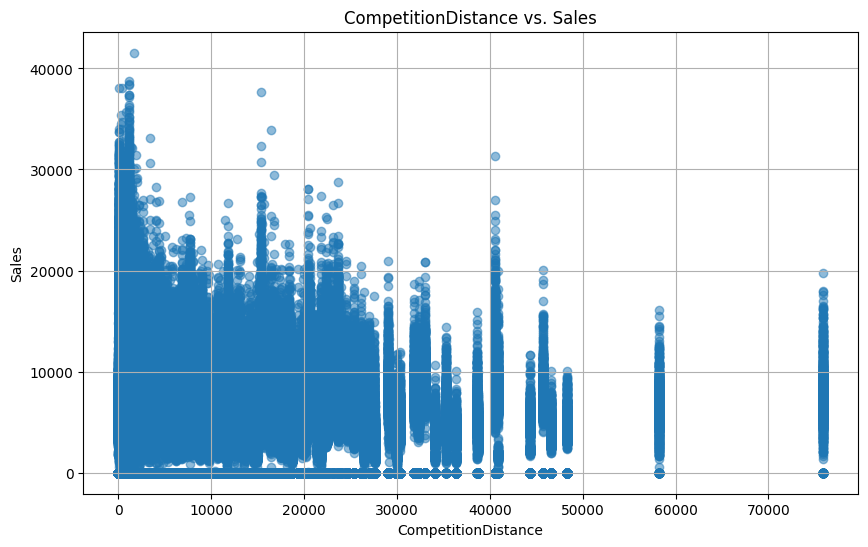

In [44]:
# 
competition_distance = merged_df['CompetitionDistance']
sales = merged_df['Sales']

plt.figure(figsize=(10, 6))
plt.scatter(competition_distance, sales, alpha=0.5)
plt.title('CompetitionDistance vs. Sales')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

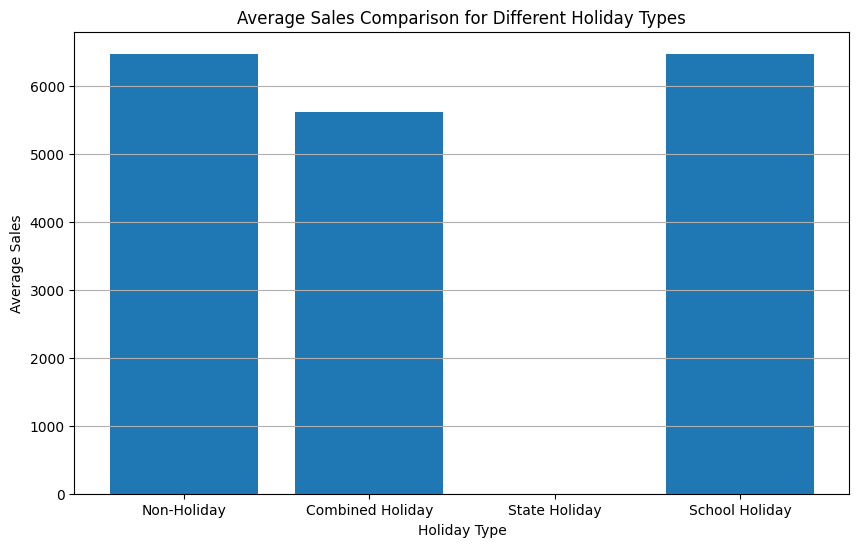

In [45]:
# average sales for non-holiday days compared to combined state and school holidays
non_holiday_sales = merged_df[merged_df['isHoliday'] == 0]['Sales'].mean()
holiday_sales = merged_df[merged_df['isHoliday'] == 1]['Sales'].mean()
state_holiday_sales = merged_df[merged_df['StateHoliday'] == 1]['Sales'].mean()
school_holiday_sales = merged_df[merged_df['SchoolHoliday'] == 1]['Sales'].mean()

labels = ['Non-Holiday', 'Combined Holiday', 'State Holiday', 'School Holiday']
average_sales = [non_holiday_sales, holiday_sales, state_holiday_sales, school_holiday_sales]

plt.figure(figsize=(10, 6))
plt.bar(labels, average_sales)
plt.title('Average Sales Comparison for Different Holiday Types')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.show()

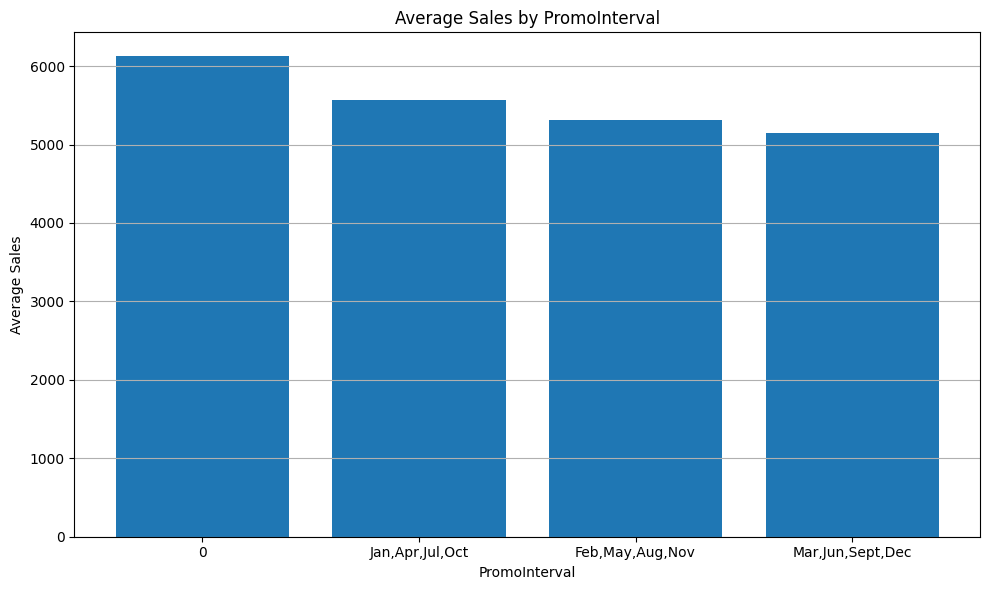

In [46]:
# averages sales by PromoInterval
merged_df['PromoInterval'] = merged_df['PromoInterval'].astype(str)
average_sales_by_promo_interval = merged_df.groupby('PromoInterval')['Sales'].mean().reset_index()
average_sales_by_promo_interval = average_sales_by_promo_interval.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_promo_interval['PromoInterval'], average_sales_by_promo_interval['Sales'])
plt.title('Average Sales by PromoInterval')
plt.xlabel('PromoInterval')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

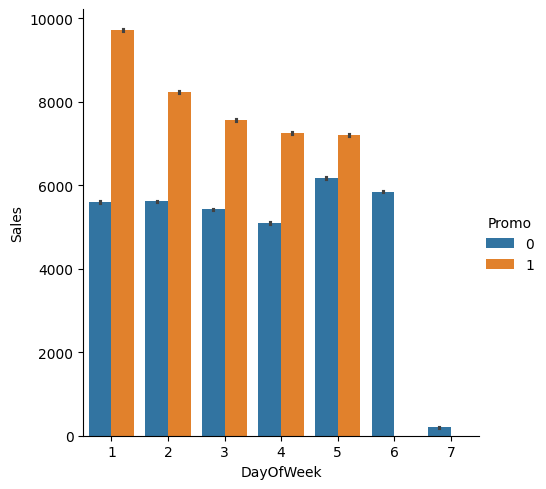

In [47]:
# Checking trends and seasonality
sns.catplot(data=merged_df, x="DayOfWeek", y="Sales", hue="Promo", kind="bar")
plt.show()

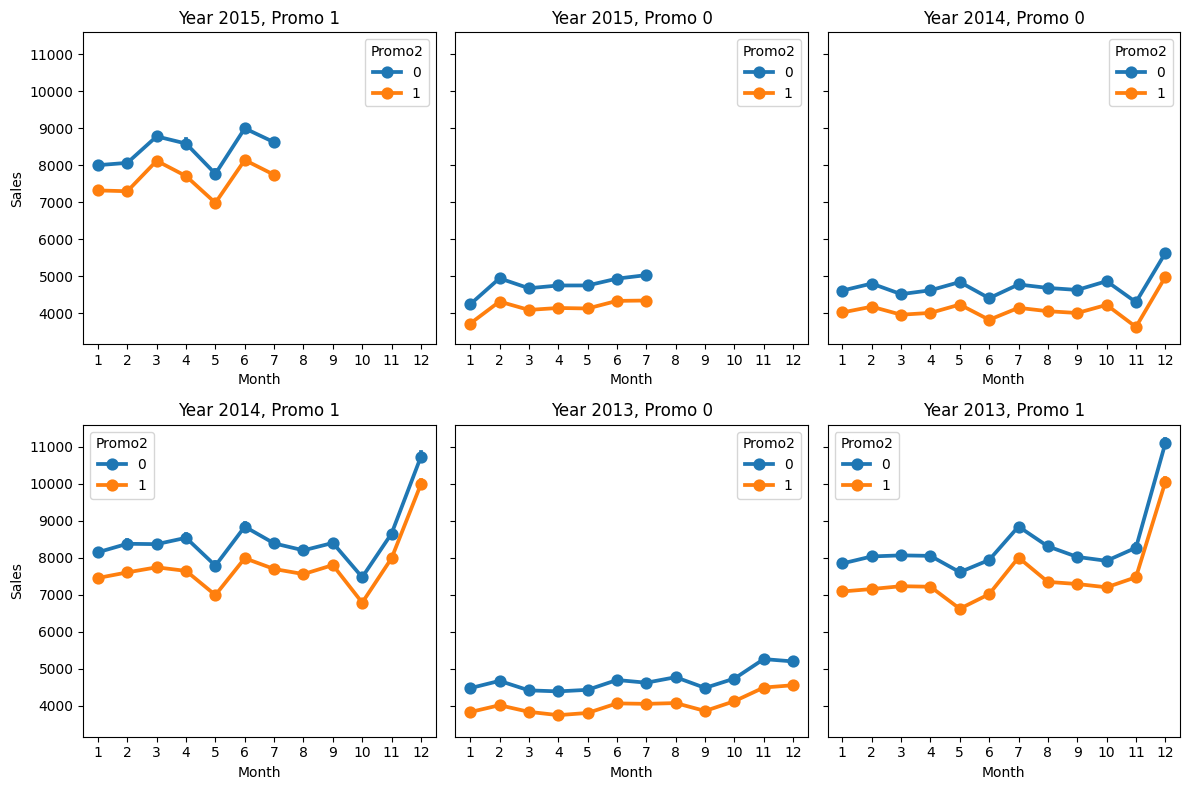

In [48]:
# Sales trend over the months and year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year

# Specify the order of months
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)

# Flatten the 3x2 array to a 1D array for easy indexing
axes = axes.flatten()

# Loop through each combination of Promo and Year
for i, (promo, year) in enumerate(merged_df[['Promo', 'Year']].drop_duplicates().values):
    ax = axes[i]
    sns.pointplot(data=merged_df[(merged_df['Promo'] == promo) & (merged_df['Year'] == year)], x="Month", y="Sales", hue="Promo2", order=month_order, ax=ax)
    ax.set_title(f"Year {year}, Promo {promo}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Sales")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Building the model

In [49]:
# https://www.kaggle.com/c/rossmann-store-sales/code
# https://medium.com/analytics-vidhya/rossmann-store-sales-prediction-998161027abf
# https://medium.com/analytics-vidhya/predicting-sales-time-series-analysis-forecasting-with-python-b81d3e8ff03f